In [4]:
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
IMAGE_SIZE = [224, 224]


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#Give dataset path
train_path = '/content/drive/MyDrive/1_final_dataset/train test valid /train'
test_path = '/content/drive/MyDrive/1_final_dataset/train test valid /test'


In [8]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


58889256/58889256 [==============================] - 0s 0us/step


In [9]:
vgg.input


<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [10]:
for layer in vgg.layers:
  layer.trainable = False

In [12]:
folders = glob('/content/drive/MyDrive/1_final_dataset/train test valid /train/*')
print(len(folders))

12


In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

In [14]:
from keras import optimizers
import tensorflow as tf 


adam = tf.keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [15]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [16]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [17]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 4379 images belonging to 12 classes.


In [18]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1245 images belonging to 12 classes.


In [44]:
for image_batch, label_batch in train_set:
  break
image_batch.shape, label_batch.shape

((32, 224, 224, 3), (32, 12))

In [45]:
print (train_set.class_indices)

labels = '\n'.join(sorted(train_set.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)



{'baby': 0, 'bottle': 1, 'box': 2, 'defect': 3, 'electronics': 4, 'illegal': 5, 'luggage': 6, 'medicine': 7, 'metal': 8, 'person': 9, 'pet': 10, 'sport': 11}


In [46]:
path = 'labels.txt'
label = np.array(open(path).read().splitlines())

In [20]:
# from datetime import datetime
# from keras.callbacks import ModelCheckpoint



# checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
#                                verbose=2, save_best_only=True)

# callbacks = [checkpoint]

# start = datetime.now()

model_history=model.fit(
  train_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set),
     verbose=2,)


# duration = datetime.now() - start
# print("Training completed in time: ", duration)

Epoch 1/20
137/137 - 353s - loss: 10.7826 - accuracy: 0.7212 - val_loss: 18.3273 - val_accuracy: 0.5936 - 353s/epoch - 3s/step
Epoch 2/20
137/137 - 203s - loss: 10.0916 - accuracy: 0.7561 - val_loss: 19.2116 - val_accuracy: 0.6257 - 203s/epoch - 1s/step
Epoch 3/20
137/137 - 202s - loss: 9.2902 - accuracy: 0.7847 - val_loss: 19.0225 - val_accuracy: 0.6643 - 202s/epoch - 1s/step
Epoch 4/20
137/137 - 201s - loss: 9.2992 - accuracy: 0.7906 - val_loss: 21.8594 - val_accuracy: 0.6490 - 201s/epoch - 1s/step
Epoch 5/20
137/137 - 199s - loss: 9.1269 - accuracy: 0.8114 - val_loss: 20.2607 - val_accuracy: 0.6675 - 199s/epoch - 1s/step
Epoch 6/20
137/137 - 198s - loss: 8.7209 - accuracy: 0.8299 - val_loss: 23.9254 - val_accuracy: 0.6482 - 198s/epoch - 1s/step
Epoch 7/20
137/137 - 199s - loss: 9.0255 - accuracy: 0.8237 - val_loss: 25.3448 - val_accuracy: 0.6498 - 199s/epoch - 1s/step
Epoch 8/20
137/137 - 199s - loss: 8.8671 - accuracy: 0.8333 - val_loss: 21.4080 - val_accuracy: 0.6884 - 199s/epoch 

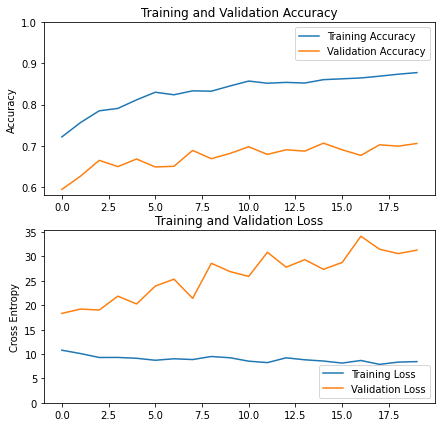

In [28]:
# _# Plot training & validation loss values
# plt.plot(model_history.history['accuracy'])
# plt.plot(model_history.history['val_accuracy'])
# plt.title('CNN Model accuracy values')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.figure(figsize=(7,7))
plt.subplot(2, 1, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

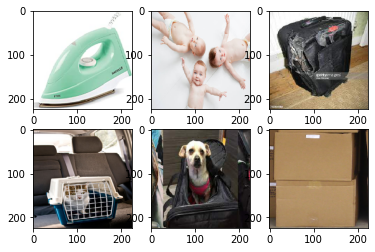

In [41]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
base_path = '/content/drive/MyDrive/1_final_dataset/train test valid /test'
img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))

for i, img_path in enumerate(random.sample(img_list, 6)):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img, dtype=np.uint8)
    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

1/1 [==============================] - 0s 17ms/step
(1, 12)
illegal


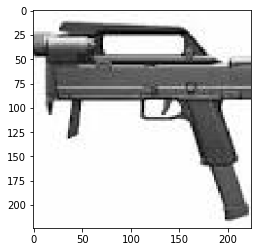

In [62]:
img_path = '/content/drive/MyDrive/1_final_dataset/train test valid /valid/illegal/illegal(386).jpg'

img=np.array(img)/255.0
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img, dtype=np.uint8)
plt.imshow(img.squeeze())
p=model.predict(img[np.newaxis])
print(p.shape)
predicted_class = label[np.argmax(p)]
print(predicted_class)

In [63]:
model.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  21
